<a href="https://colab.research.google.com/github/connectkishan1/Time_Series_Analysis/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time_Series_Analysis: Airline Passenger Prediction

Step 1: Plot Airline Passener data as time series

Step 2: Check if the data is stationary or not ( It should have constant Mean - Variance - Std)

Step 3: Converting data into stationary

Step 3a: Difference data to make data stationary on mean (remove trend)

Step 3b: Difference log transform data to make data stationary on both mean and variance

Step 4: Plot ACF and PACF to identify potential AR and MA model

Step 5: Identification of best fit ARIMA model

Step 6: Forecast sales using the best fit ARIMA model

Step 7: Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction



#Data Loading

In [2]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-10-09 14:10:25--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-10-09 14:10:25 (19.2 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



# View Dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('airline-passengers.csv')
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [21]:
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
indexed_df=df.set_index(['Month'])
indexed_df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


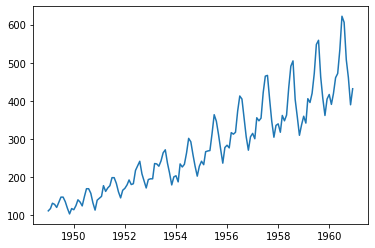

In [22]:
#plot
plt.plot(indexed_df)
plt.show()

**Check Stationarity**
- mean is not constant
- this data is not stationary

# Test to check Stationarity
- Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time. 
- Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

**How do you know if a time series is stationary?**
**or components of time series**

- Time series are stationary if they do not have,
 1. trend: overall direction of the series_ up/Downward
 2. seasonal effects: Festival season,Montly- Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.
 3. Irregularity/noise: natural disaster
 4. cyclic:dont have fix pattern.long-term business cycles

 **How to remove stationary**

 - Constant mean
 - constant variance
 - auto variance that doesnt depends on Time
 

## Determining Rolling Statistics:
A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter.

In [7]:

rol_mean=indexed_df.rolling(window=12).mean()# window size is 12 because data is avialable on montly lable..if data in day label then 365
rol_std=indexed_df.rolling(window=12).std()
print(rol_mean,rol_std)
print(rol_mean.isnull().sum())

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]
Passengers    11
dtype: int64


Here tolal 11 NaN value bcz of window.

so average can calculated and given out..

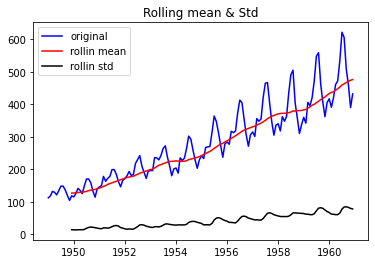

In [8]:
#plot rollin Statistics
orig=plt.plot(indexed_df,color='blue',label='original')
mean=plt.plot(rol_mean,color="red",label='rollin mean')
std=plt.plot(rol_std,color="black",label='rollin std')
plt.legend(loc='best')
plt.title("Rolling mean & Std")
plt.show(block=False)

Mean & Std is not constant so data is not stationary

## Dickey-fuller test/ADFC Test
- In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

- The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis. 
- The Augmented Dickey-Fuller test can be used with serial correlation. 
- The ADF test can handle more complex models than the Dickey-Fuller test, and it is also more powerful.

**How does ADF test work?**

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. ... The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

- a unit root test tests whether a time series variable is non-stationary and possesses a unit root.


In [9]:
# Perform Dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print('Result of dickey fuller test')
df_test=adfuller(indexed_df['Passengers'],autolag="AIC")
#Akaike information criterion  is an estimator of in-sample prediction error and thereby relative quality of statistical models for a given set of data
df_output=pd.Series(df_test[0:4],index=['test statistic','p-value','#lag used','number of observation used'])

for key,value in df_test[4].items():
  df_output['Critical Value(%s)'%key]=value
print(df_output)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Result of dickey fuller test
test statistic                  0.815369
p-value                         0.991880
#lag used                      13.000000
number of observation used    130.000000
Critical Value(1%)             -3.481682
Critical Value(5%)             -2.884042
Critical Value(10%)            -2.578770
dtype: float64


- Null Hypotesis say your p_value is alway less p value should be < 0.05 and should be rejected but here high that is .99
- we can not reject the null hypothesis if data is not a stationary

# Differencing : to make data stationary
**How do you remove a trend in a time series?**

For example, first-differencing a time series will remove a linear trend (i.e., differences=1 ); twice-differencing will remove a quadratic trend (i.e., differences=2 ). In addition, first-differencing a time series at a lag equal to the period will remove a seasonal trend (e.g., set lag=12 for monthly data).

 Between moving avg & actual number of passanger.
- Reason is that we Peroform all transform will not get this Timeseries is stationary.
- how can make stationary bcz sometime we have to take log,some type sqaur,cube root so its depends on data.

## log transform data to make data stationary on variance

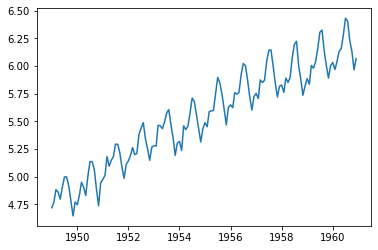

In [10]:
#Scaling: estimating Trend
import numpy as np
indexed_df_logscale=np.log(indexed_df)
plt.plot(indexed_df_logscale)

Value of y have been changed in case of log time series

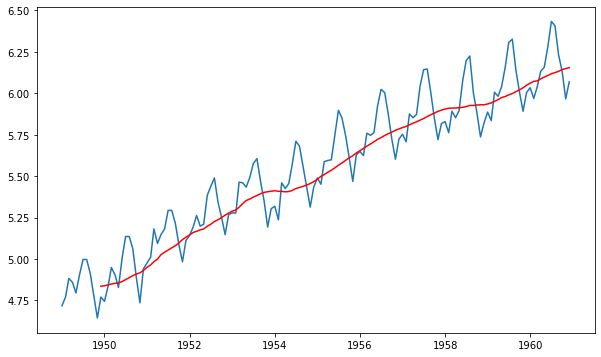

In [11]:
moving_avg=indexed_df_logscale.rolling(window=12).mean()
moving_std=indexed_df_logscale.rolling(window=12).std()

plt.figure(figsize=(10,6))
plt.plot(indexed_df_logscale)
plt.plot(moving_avg, color='red')
#plt.plot(moving_std, color='black')

moring rolling Statistcs in log time series

this time also data is not stationary aain.bcz its moving with time & train is upward

In [12]:
index_new=indexed_df_logscale-moving_avg
index_new.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [13]:
#Remove Nan value
index_new.dropna(inplace=True)
index_new.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


No handles with labels found to put in legend.


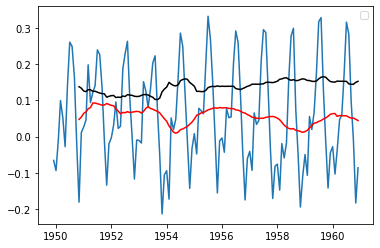

In [14]:
moving_avg_new=index_new.rolling(window=12).mean()
moving_std_new=index_new.rolling(window=12).std()
plt.plot(index_new)
plt.plot(moving_avg_new, color='red')
plt.plot(moving_std_new, color='black')
plt.legend()


In [15]:
# Perform Dickey-fuller test
print('Result of dickey fuller test2')
df_test2=adfuller(index_new['Passengers'],autolag="AIC")
#Akaike information criterion  is an estimator of in-sample prediction error and thereby relative quality of statistical models for a given set of data
df_output2=pd.Series(df_test2[0:4],index=['test statistic','p-value','#lag used','number of observation used'])

for key,value in df_test2[4].items():
  df_output2['Critical Value(%s)'%key]=value
print(df_output2)

Result of dickey fuller test2
test statistic                 -3.162908
p-value                         0.022235
#lag used                      13.000000
number of observation used    119.000000
Critical Value(1%)             -3.486535
Critical Value(5%)             -2.886151
Critical Value(10%)            -2.579896
dtype: float64


After concluding the results from ADFC TEST, p-value has reduced from 0.99 to 0.022 AND critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus,we can say that our given series is stationary.

## log transform data to make data stationary on both mean and variance

In [16]:
index_new_shifting=indexed_df_logscale-indexed_df_logscale.shift()
index_new_shifting.head()

#remove nan value
index_new_shifting.dropna(inplace=True)
index_new_shifting.head()

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


No handles with labels found to put in legend.


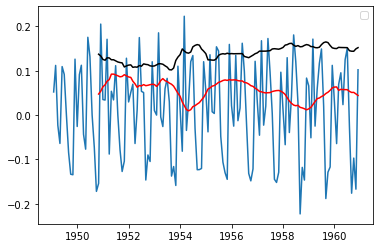

In [17]:
plt.plot(index_new_shifting)
plt.plot(moving_avg_new, color='red')
plt.plot(moving_std_new, color='black')
plt.legend()

In [20]:
# Perform Dickey-fuller test
print('Result of dickey fuller test2')
df_test3=adfuller(index_new_shifting['Passengers'],autolag="AIC")
#Akaike information criterion  is an estimator of in-sample prediction error and thereby relative quality of statistical models for a given set of data
df_output3=pd.Series(df_test3[0:4],index=['test statistic','p-value','#lag used','number of observation used'])

for key,value in df_test3[4].items():
  df_output3['Critical Value(%s)'%key]=value
print(df_output3)

Result of dickey fuller test2
test statistic                 -2.717131
p-value                         0.071121
#lag used                      14.000000
number of observation used    128.000000
Critical Value(1%)             -3.482501
Critical Value(5%)             -2.884398
Critical Value(10%)            -2.578960
dtype: float64


# Plot ACF and PACF to identify potential AR and MA model

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story. We can use the intuition for ACF and PACF above to explore some thought experiments.

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

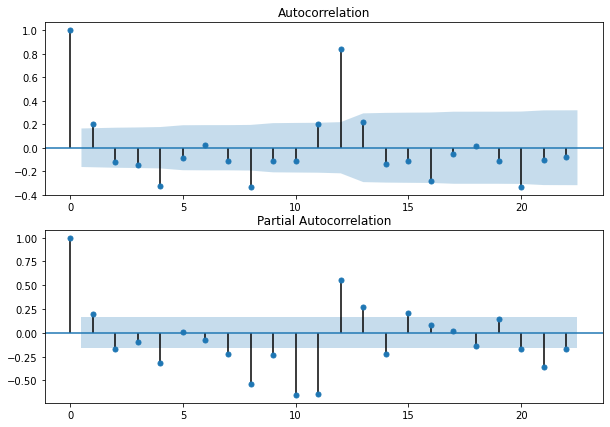

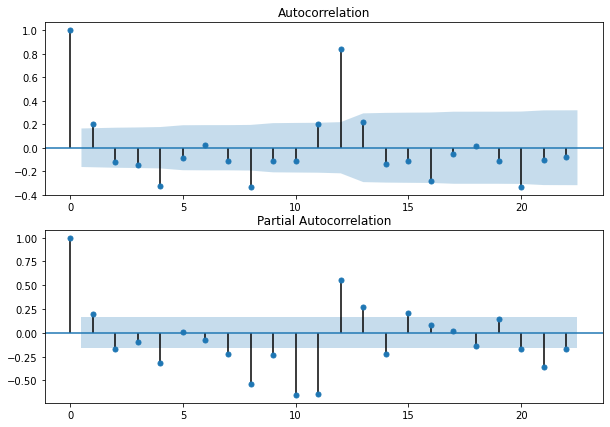

In [35]:
fig=plt.figure(figsize=(10,7))
ax1=fig.add_subplot(211)
plot_acf(index_new_shifting,ax=ax1,)
ax2=fig.add_subplot(212)
plot_pacf(index_new_shifting,ax=ax2)

# Modelling

**ARIMA**
- ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average). 
- A convenient notation for ARIMA model is ARIMA(p,d,q). Here p,d, and q are the levels for each of the AR, I, and MA parts. 
- Each of these three parts is an effort to make the final residuals display a white noise pattern (or no pattern at all).
- p: The number of lag observations included in the model, also called the lag order.(AR)
- d: The number of times that the raw observations are - differenced, also called the degree of differencing.(I)
- q: The size of the moving average window, also called the order of moving average.(MA)
- In each step of ARIMA modeling, time series data is passed through these 3 parts

*Integrated (I)*
- subtract time series with its lagged series to extract trends from the data

*Autoregression(AR)*

- extract the influence of the previous periods’ values on the current period
- A model that uses the dependent relationship between an observation and some number of lagged observations.

*Moving Average (MA)*
- extract the influence of the previous period’s error terms on the current period’s error.
- MA involves finding relationships between the previous periods’ error terms on the current period’s error term. Keep in mind, this moving average (MA) has nothing to do with moving average
-Moving Average (MA) part of ARIMA is developed with the following simple multiple linear regression values with the lagged error values as independent or predictor variables.



#Plot the predictions